# T2 - cálculo numérico
Raphael David Philippe Leveque 12542522

In [635]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp

# Questão 1

### A) Escreva um código implementando o método de Francis usando a função numpy.linalg.qr para obter as decomposições QR necessárias.

Para a letra A é necessário criar o método de francis, o qual retorna os autovetores e autovalores de uma matriz A

In [636]:
def francis(matriz, tolerancia=1e-10):
    # Obter o número de linhas (m) e colunas (n) da matriz
    m, n = matriz.shape
    matriz_copia = np.copy(matriz)
    V = np.eye(n)
    erro = np.infty

    # Loop principal para calcular a decomposição QR
    while erro > tolerancia:
        Q, R = np.linalg.qr(matriz_copia)
        matriz_copia = R @ Q
        V = V @ Q
        erro = np.max(np.abs(np.tril(matriz_copia, -1)))

    # Obter a diagonal principal da matriz copiada como os autovalores
    diagonal = np.diag(matriz_copia)

    return diagonal, V


### B) Usando a rotina implementada para o método de Francis, escreva um código que retorne a decomposição SVD de uma matriz qualquer Am×n.

In [637]:
def svd(matriz):
    # Obtém as dimensões da matriz
    m, n = matriz.shape
    
    # Calcula a decomposição QR de A^T * A
    U, V = francis((matriz.T).dot(matriz))
    
    # Calcula os valores singulares como a raiz quadrada dos autovalores de A^T * A
    valores_singulares = np.sqrt(np.abs(U))
    
    # Calcula a matriz de autovetores esquerdos U
    U = matriz.dot(V) / valores_singulares
    
    return U, valores_singulares, V

### C) Podemos armazenar uma imagem em uma matriz Am×n. Toda imagem consiste em um conjunto de pixels que são os blocos de construção dessa imagem. Cada pixel representa a cor ou a intensidade da luz em um local específico na imagem. Em uma imagem em escala de cinza em formato PNG, cada pixel tem um valor entre 0 e 1, em que 0 corresponde ao preto e 1 corresponde ao branco. Assim, uma imagem em escala de cinza com m×n pixels pode ser armazenada em uma matriz m × n com valores entre 0 e 1. Use a função imread() da biblioteca Matplotlib do Python para carregar uma imagem de uma foto pessoal em escala de cinza. Depois, use as decomposições SVD numpy.linalg.svd e a implementada no item 2) para comprimir a imagem, representando-a por k (k < min{m, n}) valores singulares, ou seja, troque a matriz A por Ak = U[:, : k] ∗ Σ[: k, : k] ∗ VT[: k, :]. Plote a imagem original e a imagem 50% e 70% comprimida e compare os resultados. Para tal, use a função imshow(), também da biblioteca Matplotlib.

Para fazer o teste das funções criadas podemos usar a compressão de uma imagem

In [638]:
image = plt.imread('imagem.jpeg')
# Coeficientes para converter a imagem em escala de cinza
coeficientes = [0.299, 0.587, 0.144]
# Multiplicando a matriz da imagem pelos coeficientes para obter a escala de cinza
image = image[...,:3] @ coeficientes
# Normalizando a imagem dividindo pelo valor máximo
image /= np.max(image)

In [639]:
def comprimirImagem(matriz_U, matriz_S, matriz_V, p):
  # Calcula o valor de k com base na porcentagem de compressão p
  k = int(matriz_U.shape[1] * (1 - p))

  matriz_U_k = matriz_U[:, :k]  # Primeiros k autovetores da matriz U
  matriz_S_k = np.diag(matriz_S[:k])  # Primeiros k autovalores formando uma matriz diagonal S_k
  matriz_V_k = matriz_V.T[:k, :]  # Primeiras k linhas da matriz transposta V

  # Imagem comprimida: produto das matrizes matriz_U_k, matriz_S_k e matriz_V_k
  imagem_comprimida = np.matmul(np.matmul(matriz_U_k, matriz_S_k), matriz_V_k)
  return imagem_comprimida


In [640]:
U, S, V = svd(image)
imagem_25 = comprimirImagem(U, S, V, 0.25)
imagem_50 = comprimirImagem(U, S, V, 0.5)
imagem_85 = comprimirImagem(U, S, V, 0.85)

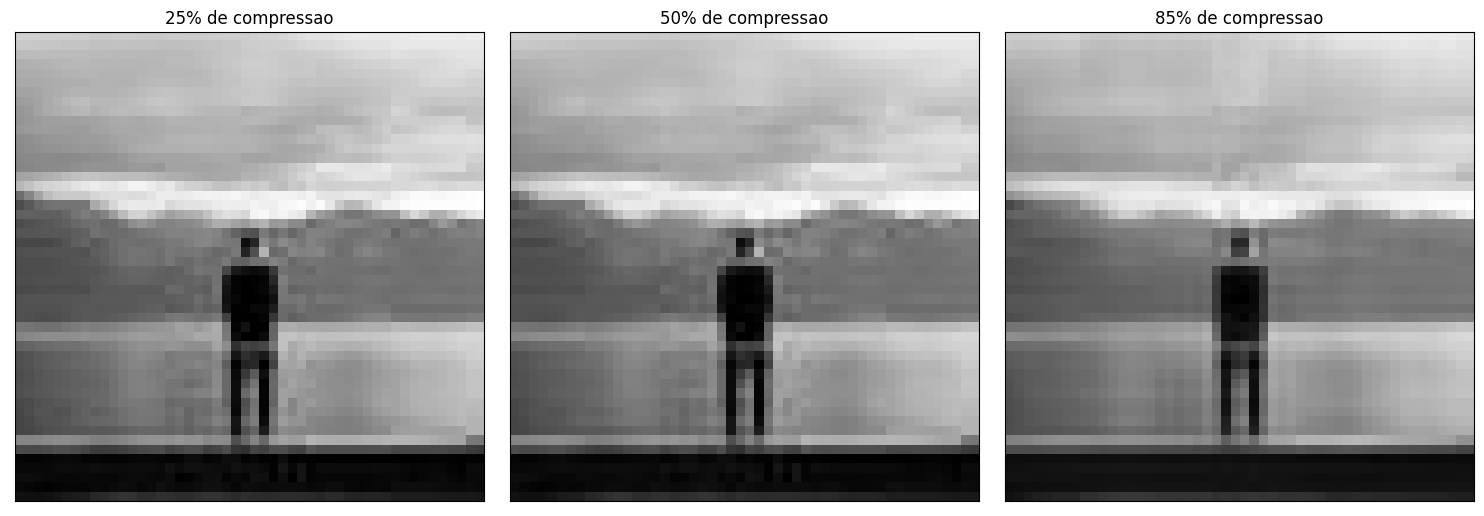

In [641]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
imagens = [imagem_25, imagem_50, imagem_85]
compressao = ["25% ", "50% ", "85% "]
for i in range(3):
    axs[i].imshow(imagens[i], cmap='gray')
    axs[i].set_title(compressao[i] + "de compressao")
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

# Questão 2

### A) Implemente a interpolação de Lagrange e de Newton.

In [642]:
# Interpolação de Lagrange
def lagrange_interp(xi, yi, x):
    n, m = len(xi), len(x)
    result = np.zeros(m)

    for i in range(n):
        polynomial_i = np.ones(m)
        for j in range(n):
            if i != j:
                polynomial_i = polynomial_i * ((x - xi[j]) / (xi[i] - xi[j]))
        result = result + (yi[i] * polynomial_i)

    return result


# Interpolação de Newton
def newton_interp(xi, yi, x):
    num_points, num_eval_points = len(xi), len(x)
    coefficients = np.copy(yi)

    for i in range(1, num_points):
        for j in range(i, num_points):
            coefficients[j] = (coefficients[j] - coefficients[i-1]) / (xi[j] - xi[i-1])

    result, product = np.zeros(num_eval_points), np.ones(num_eval_points)

    for i in range(num_points):
        result += coefficients[i] * product
        product *= (x - xi[i])

    return result

### B) Usando 11 pontos igualmente espaçados dentro do intervalo dado, calcule as interpolações de Lagrange e Newton com o código implementado no item anterior.

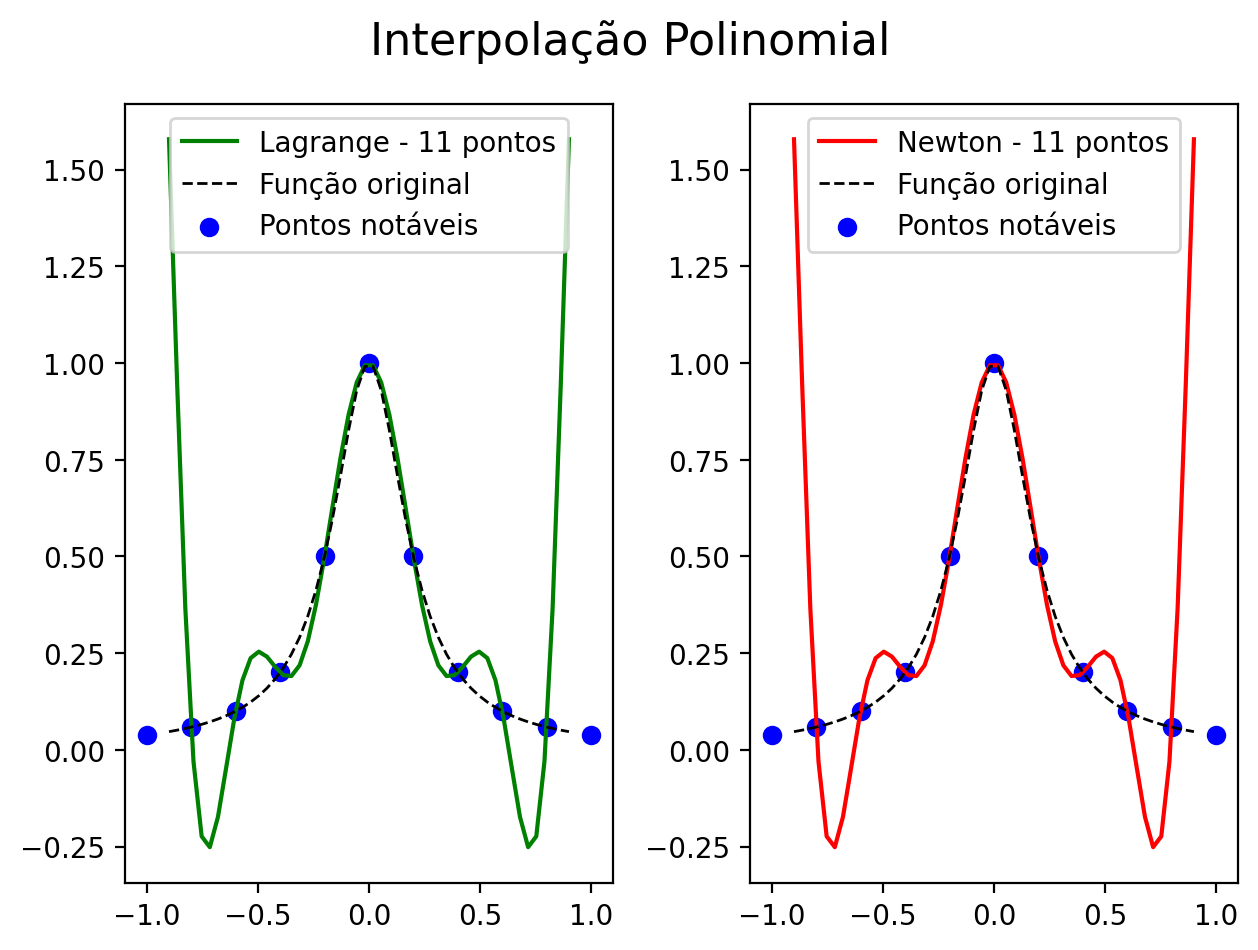

In [643]:
# Função f(x) para interpolação
def f(x):
    return 1 / (1 + 25 * x**2)

# Pontos de interpolação
x_11 = np.linspace(-1, 1, 11)
x_plot = np.linspace(-0.9, 0.9, 50)

# Cálculo das interpolações
y_lagr_11 = lagrange_interp(x_11, f(x_11), x_plot)
y_newt_11 = newton_interp(x_11, f(x_11), x_plot)

# Plot dos gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
ax[0].plot(x_plot, y_lagr_11, color='green', label='Lagrange - 11 pontos')
ax[1].plot(x_plot, y_newt_11, color='red', label='Newton - 11 pontos')

# Configurações iguais nos plots
ax[0].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[1].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')

# Adicionar pontos notáveis
ax[0].scatter(x_11, f(x_11), color='blue', label='Pontos notáveis')
ax[1].scatter(x_11, f(x_11), color='blue', label='Pontos notáveis')
ax[0].legend()
ax[1].legend()

plt.suptitle('Interpolação Polinomial', fontsize=16)
plt.tight_layout()
plt.show()

### C) Repita o processo com 21 pontos. O que acontece? Exiba o gráfico das soluções comparando com a exata.

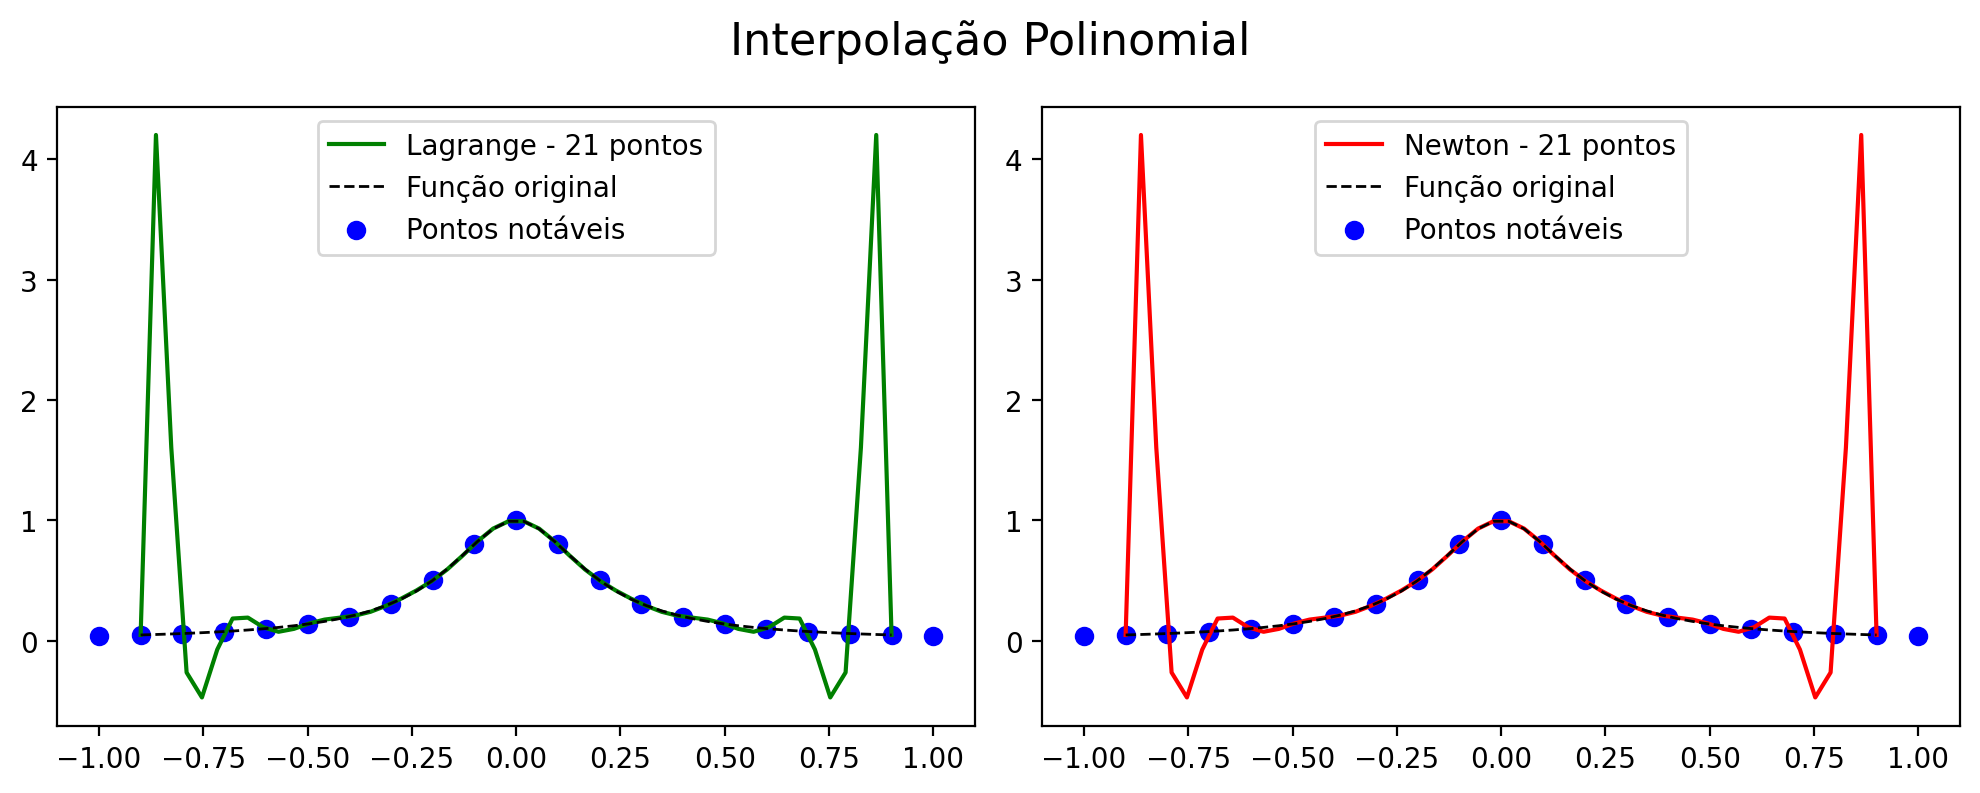

In [644]:
# Função f(x) para interpolação
def f(x):
    return 1 / (1 + 25 * x**2)

# Pontos de interpolação
x_21 = np.linspace(-1, 1, 21)
x_plot = np.linspace(-0.9, 0.9, 50)

# Cálculo das interpolações
y_lagr_21 = lagrange_interp(x_21, f(x_21), x_plot)
y_newt_21 = newton_interp(x_21, f(x_21), x_plot)

# Plot dos gráficos
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), dpi=200)
ax[0].plot(x_plot, y_lagr_21, color='green', label='Lagrange - 21 pontos')
ax[1].plot(x_plot, y_newt_21, color='red', label='Newton - 21 pontos')

# Configurações iguais nos plots
ax[0].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[0].legend()
ax[1].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[1].legend()

# Adicionar pontos notáveis
ax[0].scatter(x_21, f(x_21), color='blue', label='Pontos notáveis')
ax[1].scatter(x_21, f(x_21), color='blue', label='Pontos notáveis')
ax[0].legend()
ax[1].legend()


plt.suptitle('Interpolação Polinomial', fontsize=16)
plt.tight_layout()
plt.show()


Os gráficos de interpolação de Lagrange e Newton, utilizando o mesmo número de pontos, produzem o mesmo polinômio de interpolação. A escolha da quantidade de pontos de interpolação é fundamental para obter uma aproximação precisa. Em geral, ao aumentar o número de pontos de interpolação, a precisão da aproximação tende a melhorar, especialmente em regiões próximas aos pontos interpolados.

### D) Usando a função scipy.interpolate.interp1d, calcule a interpolação usando spline linear e cúbica. Exiba os gráficos e comente as diferenças das soluções deste item para os anteriores.

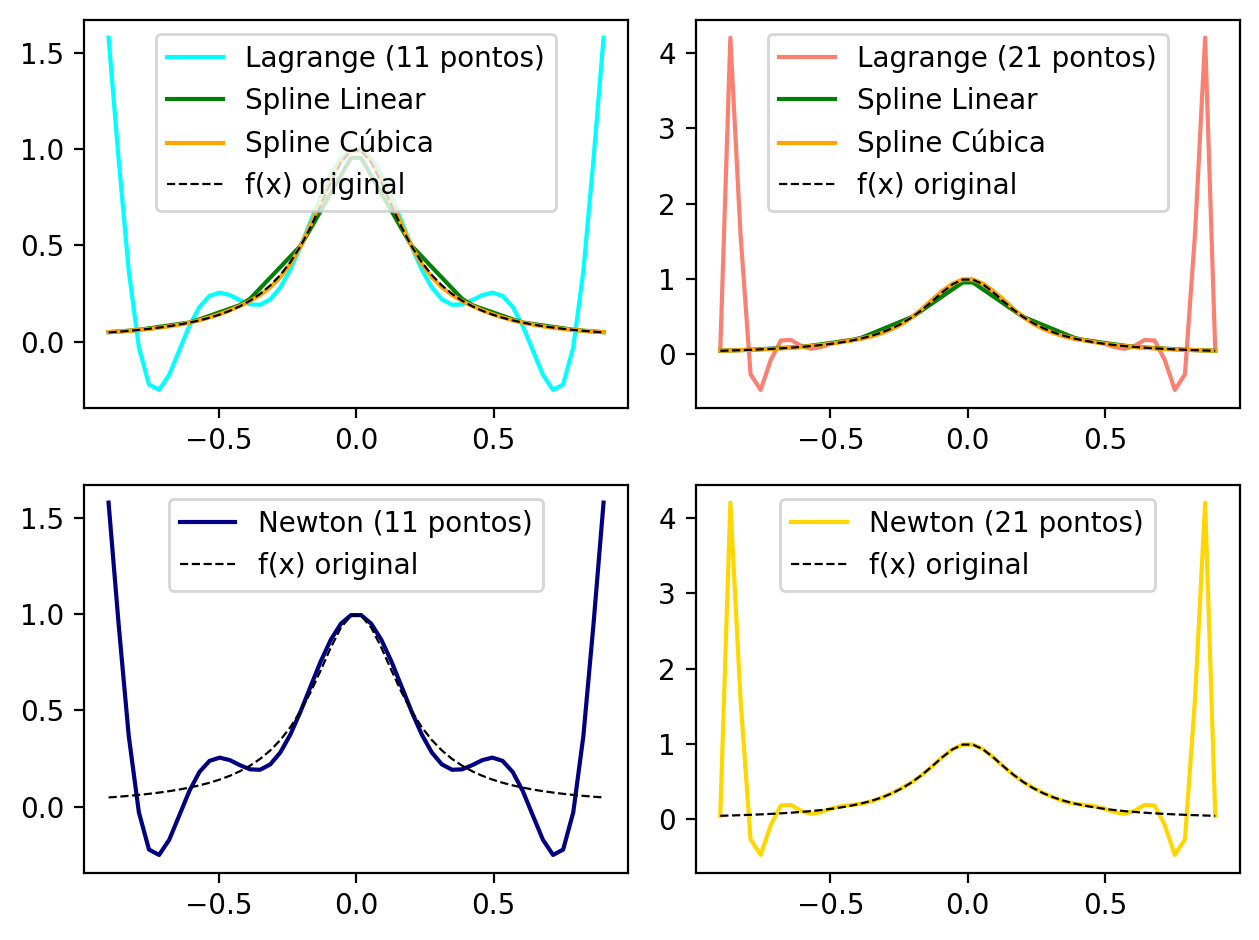

In [645]:
from scipy.interpolate import interp1d

# Pontos de interpolação
x_interp_11 = np.linspace(-1, 1, 11)
x_interp_21 = np.linspace(-1, 1, 21)
x_plot = np.linspace(-0.9, 0.9, 50)

# Cálculo das interpolações usando spline linear e cúbica
spline_linear = interp1d(x_interp_11, f(x_interp_11), kind='linear')
spline_cubica = interp1d(x_interp_11, f(x_interp_11), kind='cubic')

y_spline_linear = spline_linear(x_plot)
y_spline_cubica = spline_cubica(x_plot)

# Plot dos gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=200)
ax[0, 0].plot(x_plot, y_lagr_11, color='cyan', label='Lagrange (11 pontos)')
ax[0, 1].plot(x_plot, y_lagr_21, color='salmon', label='Lagrange (21 pontos)')
ax[1, 0].plot(x_plot, y_newt_11, color='navy', label='Newton (11 pontos)')
ax[1, 1].plot(x_plot, y_newt_21, color='gold', label='Newton (21 pontos)')

ax[0, 0].plot(x_plot, y_spline_linear, color='green', label='Spline Linear')
ax[0, 1].plot(x_plot, y_spline_linear, color='green', label='Spline Linear')
ax[0, 0].plot(x_plot, y_spline_cubica, color='orange', label='Spline Cúbica')
ax[0, 1].plot(x_plot, y_spline_cubica, color='orange', label='Spline Cúbica')

# Configurações iguais nos plots
for i in range(2):
    for j in range(2):
        ax[i, j].plot(x_plot, f(x_plot), '--', color='black', linewidth=0.8, label='f(x) original')
        ax[i, j].legend()

plt.tight_layout()
plt.show()


A interpolação por spline linear produz curvas suaves, mas não se ajusta perfeitamente aos dados. Ela subestima as oscilações da função original e é menos precisa do que as interpolações de Lagrange e Newton.

Já a interpolação por spline cúbica é mais precisa e produz curvas suaves que se ajustam melhor aos dados. Ela captura com mais precisão as oscilações da função original, mesmo com um número menor de pontos de interpolação.

### E) Repita os itens b) e c) com nós de Chebyshev.

Agora uma outra forma de evitar o fenômeno de Hunge e deixar a interpolação mais precisa é utilizando os nós de chebyshev.

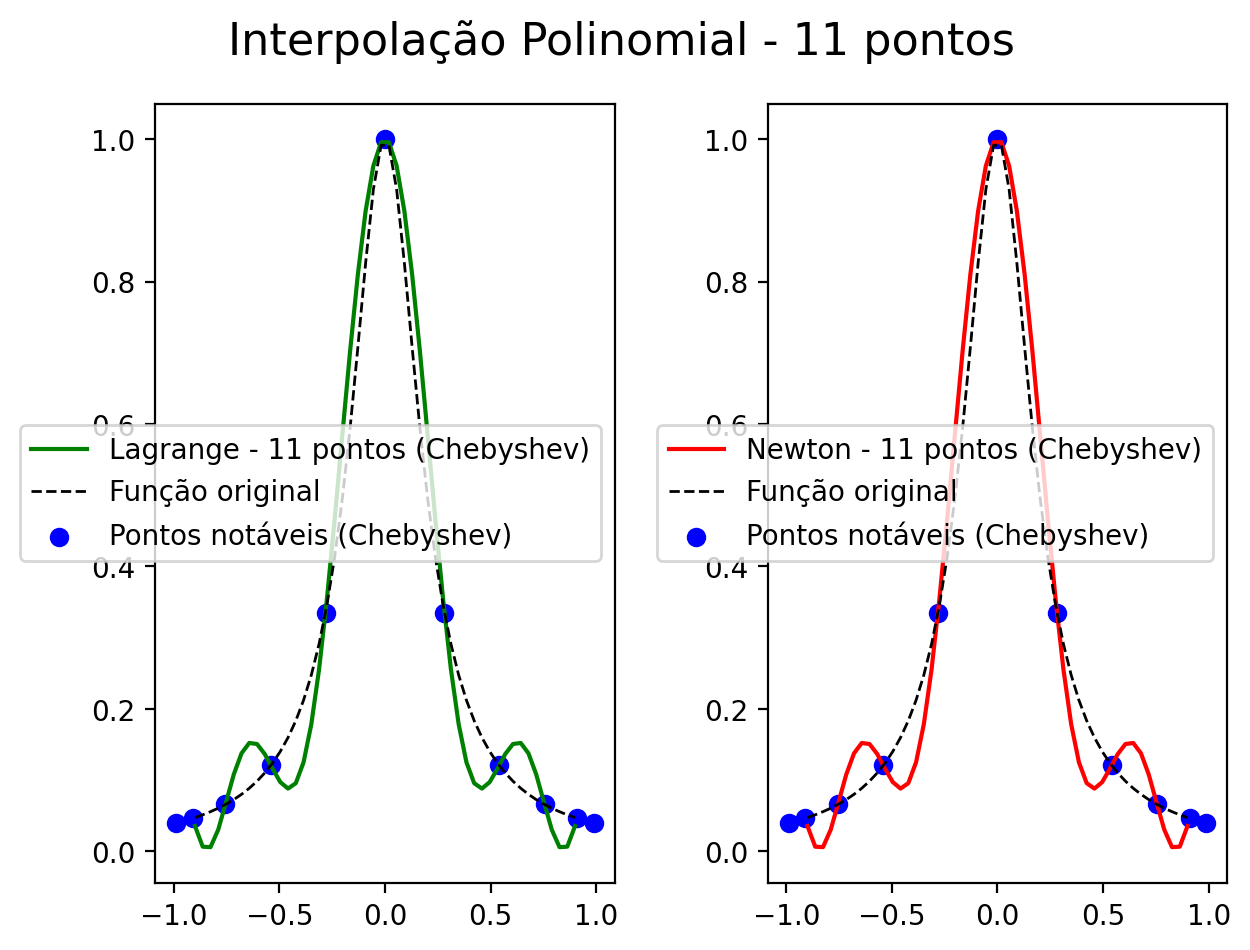

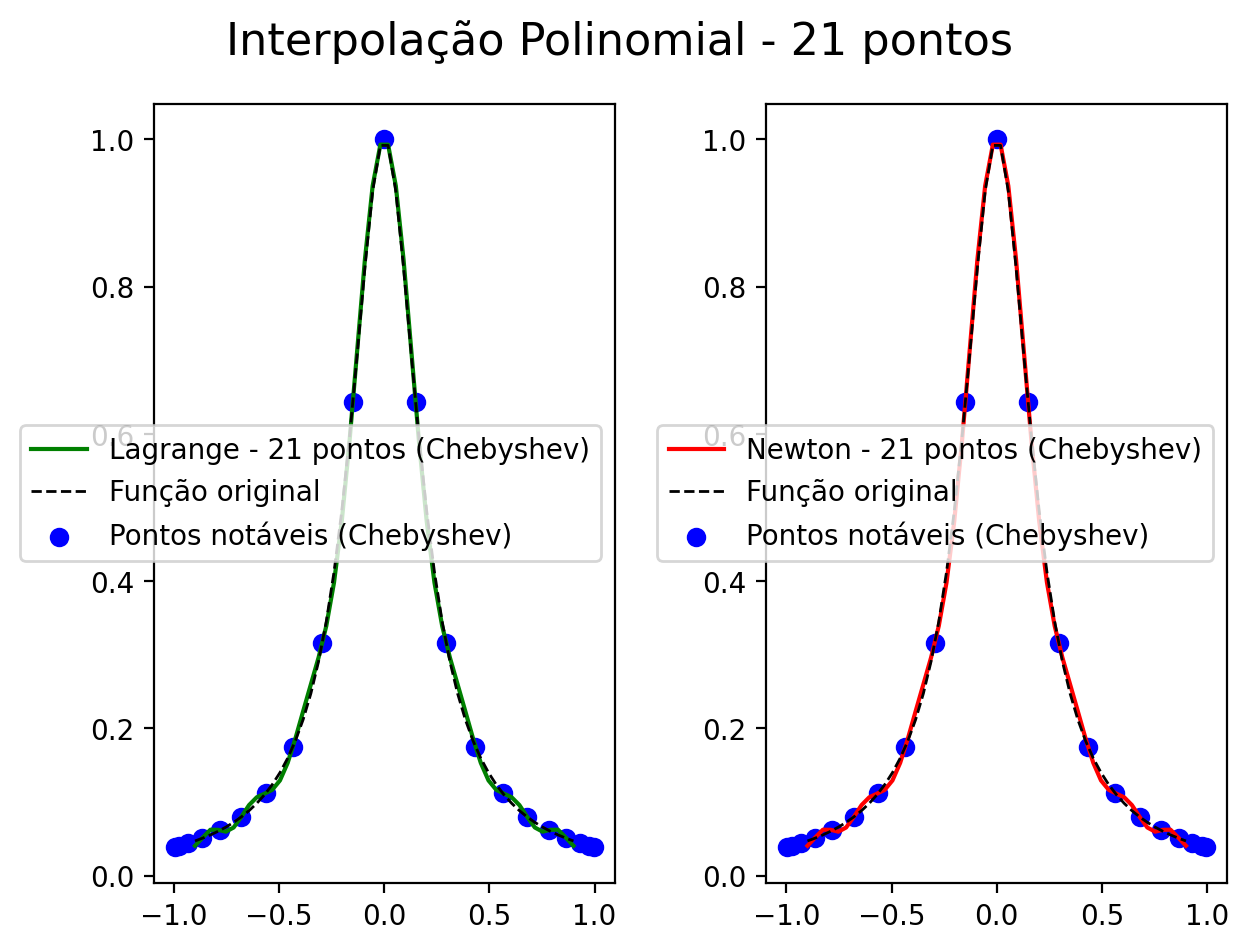

In [646]:
# Pontos de interpolação (11 pontos)
x_cheb_11 = np.polynomial.chebyshev.chebpts1(11)
x_plot = np.linspace(-0.9, 0.9, 50)

# Cálculo das interpolações (11 pontos)
y_lagr_cheb_11 = lagrange_interp(x_cheb_11, f(x_cheb_11), x_plot)
y_newt_cheb_11 = newton_interp(x_cheb_11, f(x_cheb_11), x_plot)

# Plot dos gráficos (11 pontos)
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
ax[0].plot(x_plot, y_lagr_cheb_11, color='green', label='Lagrange - 11 pontos (Chebyshev)')
ax[1].plot(x_plot, y_newt_cheb_11, color='red', label='Newton - 11 pontos (Chebyshev)')

# Configurações iguais nos plots
ax[0].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[1].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')

# Adicionar pontos notáveis
ax[0].scatter(x_cheb_11, f(x_cheb_11), color='blue', label='Pontos notáveis (Chebyshev)')
ax[1].scatter(x_cheb_11, f(x_cheb_11), color='blue', label='Pontos notáveis (Chebyshev)')
ax[0].legend()
ax[1].legend()

plt.suptitle('Interpolação Polinomial - 11 pontos', fontsize=16)
plt.tight_layout()
plt.show()

# Pontos de interpolação (21 pontos)
x_cheb_21 = np.polynomial.chebyshev.chebpts1(21)

# Cálculo das interpolações (21 pontos)
y_lagr_cheb_21 = lagrange_interp(x_cheb_21, f(x_cheb_21), x_plot)
y_newt_cheb_21 = newton_interp(x_cheb_21, f(x_cheb_21), x_plot)

# Plot dos gráficos (21 pontos)
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=200)
ax[0].plot(x_plot, y_lagr_cheb_21, color='green', label='Lagrange - 21 pontos (Chebyshev)')
ax[1].plot(x_plot, y_newt_cheb_21, color='red', label='Newton - 21 pontos (Chebyshev)')

# Configurações iguais nos plots
ax[0].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[0].legend()
ax[1].plot(x_plot, f(x_plot), '--', color='black', linewidth=1, label='Função original')
ax[1].legend()

# Adicionar pontos notáveis
ax[0].scatter(x_cheb_21, f(x_cheb_21), color='blue', label='Pontos notáveis (Chebyshev)')
ax[1].scatter(x_cheb_21, f(x_cheb_21), color='blue', label='Pontos notáveis (Chebyshev)')
ax[0].legend()
ax[1].legend()

plt.suptitle('Interpolação Polinomial - 21 pontos', fontsize=16)
plt.tight_layout()
plt.show()


A interpolação usando nós de Chebyshev oferece uma abordagem mais eficaz para a interpolação de funções, resultando em resultados mais precisos, minimizando o erro máximo e controlando as oscilações.

# Questão 3

### A) Explique cada um dos códigos dados acima. O que está sendo calculado?

In [647]:
def mmq(x, y, k):
    X = np.vander(x, k)
    A = X.T @ X
    b = X.T @ y

    return np.linalg.solve(A, b)

A função "mmq" implementa o método dos mínimos quadrados para ajustar uma função do tipo g(x) = ab^x, onde a e b são parâmetros a serem determinados, aos dados de entrada (x, y). Essa função recebe três argumentos: x (os valores de x), y (os valores de y) e k (a ordem do polinômio a ser ajustado).

Na primeira linha, a função gera uma matriz X através da função "np.vander(x, k)". Essa matriz contém as potências de x de 0 a k-1, o que permite representar um polinômio de ordem k-1. Por exemplo, se x = [1, 2, 3] e k = 3, a matriz X será:

Na segunda linha, a função calcula a matriz A, que é o produto da matriz X transposta por X. Isso é feito usando o método "np.transpose(X).dot(X)".

Na terceira linha, a função calcula o vetor b, que é o produto da matriz X transposta por y. Isso é feito usando o método "np.transpose(X).dot(y)".

Na quarta linha, a função resolve o sistema de equações lineares A * a = b para obter o vetor a. Isso é feito usando a função "np.linalg.solve(A, b)".

Por fim, a função retorna o vetor a, que contém os parâmetros a e b da função g(x) = ab^x.

In [648]:
def mmqQR(x, y, k):
    X = np.vander(x, k)
    Q, R = np.linalg.qr(X)

    b = Q.T @ y

    return np.linalg.solve(R, b)

A função "mmqQR" também implementa o método dos mínimos quadrados, porém utiliza a decomposição QR para resolver o sistema de equações lineares. Ela recebe os mesmos argumentos que a função "mmq".

Na primeira linha, a função gera a matriz X da mesma forma que a função "mmq".

Na segunda linha, a função calcula a decomposição QR da matriz X usando o método "np.linalg.qr(X)". Essa decomposição separa a matriz X em duas matrizes Q e R, onde Q é uma matriz ortogonal e R é uma matriz triangular superior.

Na terceira linha, a função calcula o vetor b da mesma forma que a função "mmq".

Na quarta linha, a função resolve o sistema de equações lineares R * a = b para obter o vetor a, utilizando a função "np.linalg.solve(R, b)".

Por fim, a função retorna o vetor a, que contém os parâmetros a e b da função g(x) = ab^x.

### B) Aproxime, no sentido dos mínimos quadrados, os dados do período completo, de 26 de fevereiro de 2020 a 18 de junho de 2020, pela função descrita no enunciado. Use um dos códigos dados acima.

Precisamos linearizar a função $f(x)$:

$f(x) = ab^x$

$ln(f(x)) = ln(ab^x)$

$ln(f(x)) = a' + b'x$

$y = a' + b'x$

In [649]:
# Abrir o arquivo em modo de leitura
with open('casosacumuladosbrasilatuaizado.txt', 'r') as file:
    # Ler todas as linhas do arquivo e armazená-las em uma lista
    linhas = file.readlines()

# Inicializar um array vazio para armazenar os números
numeros = []

# Iterar sobre cada linha
for linha in linhas:
    # Remover espaços em branco e quebras de linha
    linha_limpa = linha.strip()
    
    # Converter o valor para um número e adicioná-lo ao array
    numeros.append(int(linha_limpa))

# Agora, o array 'numeros' contém todos os valores do arquivo
y = np.array(numeros)
x = np.arange(len(y))


In [650]:
# Aplicando o método dos mínimos quadrados
b_, a_ = mmq(x, np.log(y), 2)

# Calculando os coeficientes a e b
a, b = np.exp([a_, b_])

print("a: {}\nb: {}".format(a, b))

a: 35.31304154317277
b: 1.1113520177397236


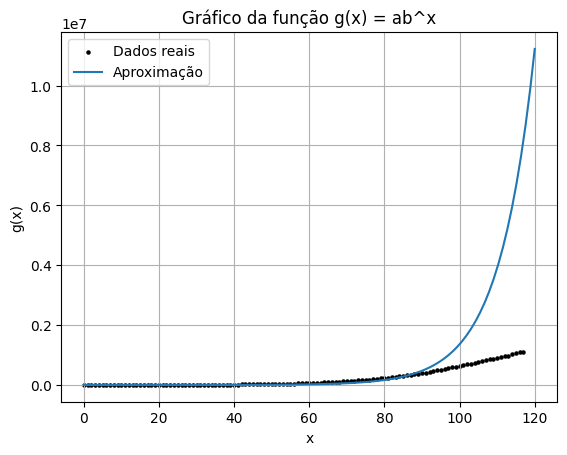

In [651]:
x_plot = np.linspace(0, 120, 100)  # Intervalo de x de 0 a 10 com 100 pontos

# Calcular os valores de y usando a função g(x)
y_plot = a * np.power(b, x_plot)

# Plotar o gráfico
plt.scatter(x, y, s=5, color='black', label='Dados reais')
plt.plot(x_plot, y_plot, label='Aproximação')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Gráfico da função g(x) = ab^x')
plt.grid(True)
plt.legend()
plt.show()

### C) Repita o item b) considerando apenas os dados dos primeiros 20 dias.

In [652]:
# Aplicando o método dos mínimos quadrados aos primeiros 20 pontos
b_, a_ = mmq(x[:20], np.log(y[:20]), 2)

# Calculando os coeficientes a e b
a_20, b_20 = np.exp([a_, b_])

print(f"a: {a_20}\nb: {b_20}")

a: 0.5965414187660091
b: 1.3717182549417715


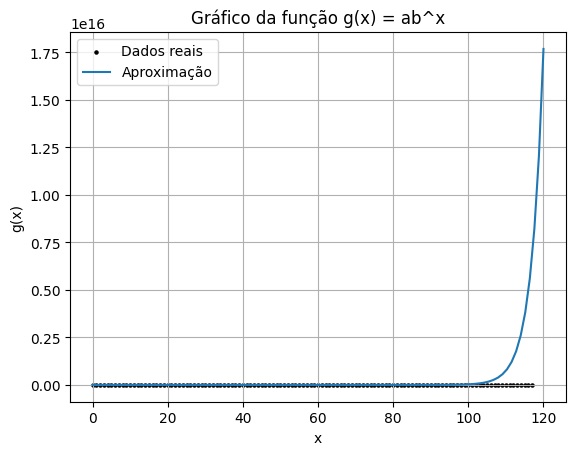

In [653]:
x_plot = np.linspace(0, 120, 100)  # Intervalo de x de 0 a 10 com 100 pontos

# Calcular os valores de y usando a função g(x)
y_plot = a_20 * np.power(b_20, x_plot)

# Plotar o gráfico
plt.scatter(x, y, s=5, color='black', label='Dados reais')
plt.plot(x_plot, y_plot, label='Aproximação')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Gráfico da função g(x) = ab^x')
plt.grid(True)
plt.legend()
plt.show()

### D) Repita o item b) considerando apenas os dados dos últimos 50 dias.

In [654]:
# Aplicando o método dos mínimos quadrados aos primeiros 20 pontos
b_, a_ = mmq(x[-50:], np.log(y[-50:]), 2)

# Calculando os coeficientes a e b
a_50, b_50 = np.exp([a_, b_])

print("a: {}\nb: {}".format(a_50, b_50))

a: 5027.402520446429
b: 1.0487908743252625


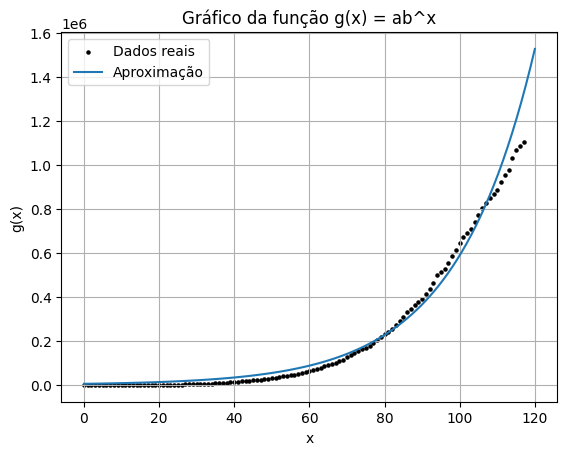

In [655]:
x_plot = np.linspace(0, 120, 100)  # Intervalo de x de 0 a 10 com 100 pontos

# Calcular os valores de y usando a função g(x)
y_plot = a_50 * np.power(b_50, x_plot)

# Plotar o gráfico
plt.scatter(x, y, s=5, color='black', label='Dados reais')
plt.plot(x_plot, y_plot, label='Aproximação')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Gráfico da função g(x) = ab^x')
plt.grid(True)
plt.legend()
plt.show()

### E) Compare os itens b), c) e d) e descreva o tipo de informação fornecida pelos dados.

Ao examinar os dados ao longo de diferentes períodos, observamos padrões variados na curva. Inicialmente, há um crescimento rápido e acentuado, com o coeficiente $b$ superando o coeficiente $a$. No entanto, a curva não se ajusta precisamente aos dados nas extremidades devido à ausência de coeficientes. No final, há uma melhor adaptação da função aos dados, com o coeficiente $b$ diminuindo e o coeficiente $a$ aumentando.